# NLP Visualizations of Macbeth and Romeo and Juliet

Execute the following cell for important imports.

In [1]:
import requests
import matplotlib.pyplot as plt
import nltk

from nltk.tokenize import word_tokenize
from nltk.sentiment import vader
from nltk.corpus import stopwords
from nltk.corpus import opinion_lexicon
from nltk.stem.porter import PorterStemmer

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('vader_lexicon')
nltk.download('opinion_lexicon')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data] Downloading package opinion_lexicon to /root/nltk_data...
[nltk_data]   Unzipping corpora/opinion_lexicon.zip.


True

Execute the following cell to get the text of "Macbeth" and "Romeo and Juliet" from [Project Gutenberg](https://www.gutenberg.org/)

In [2]:
target_url = "https://www.gutenberg.org/files/1533/1533-0.txt"
response = requests.get(target_url)
macbeth_string = response.text
macbeth_string = macbeth_string.split('*** START OF THE PROJECT GUTENBERG EBOOK MACBETH ***')[1]
macbeth_string = macbeth_string.split('*** END OF THE PROJECT GUTENBERG EBOOK MACBETH ***')[0]
macbeth_string = macbeth_string.lower()

target_url = "https://www.gutenberg.org/files/1513/1513-0.txt"
response = requests.get(target_url)
r_j_string = response.text
r_j_string = r_j_string.split('*** START OF THE PROJECT GUTENBERG EBOOK 1513 ***')[1]
r_j_string = r_j_string.split('*** END OF THE PROJECT GUTENBERG EBOOK 1513 ***')[0]
r_j_scenes = [i.lower() for i in r_j_string.split('SCENE')[1:]]

You now have the following variables:
* `macbeth_string`: this string contains the full text of "Macbeth"
* `r_j_string`: this string contains the full text of "Romeo and Juliet"
* `r_j_scenes`: the text from each scene of "Romeo and Juliet" is included in this Python list, with one scene per list item

Make two new variables:
* a Python list of stopwords
* a variable for using VADER's SentimentIntensityAnalyzer

In [3]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

stop_words = set(stopwords.words('english'))
sia = SentimentIntensityAnalyzer()

## Macbeth

Make a list of the words in Macbeth by tokenizing `macbeth_string`:

In [4]:
macbeth_words = word_tokenize(macbeth_string)

Next, make a list of positive words and a list of negative words using the `polarity_scores` method of VADER's SentimentIntensityAnalyzer.  To do this:
* Write a for loop that iterates over your Macbeth word list
  * If the compound score of a word is positive, add the word to the positive-word list
  * If the compound score of a word is negative, add the word to the negative-word list
  * If the compound score is 0, the word should not be added to either list

In [5]:
positive_words = []
negative_words = []

for word in macbeth_words:
    score = sia.polarity_scores(word)['compound']

    if score > 0:
        positive_words.append(word)
    elif score < 0:
        negative_words.append(word)

1. Find the 15 most common negative words in Macbeth and the 15 most common positive words
    * Note that if you have a list variable called `mylist`, you can get the frequencies of words in `mylist` by using `nltk.FreqDist(mylist)`, and you can get the `n` most common words with `nltk.FreqDist(mylist).most_common(n)`.
2. Make a horizontal bar plot similar to the plots in the following image
3. Comment on similarities and differences to the Macbeth plot below

(Plot taken from a [2018 post by Peer Chirstensen](https://web.archive.org/web/20230129014418/https://peerchristensen.netlify.app/post/fair-is-foul-and-foul-is-fair-a-tidytext-entiment-analysis-of-shakespeare-s-tragedies/))

![image.png](attachment:image.png)

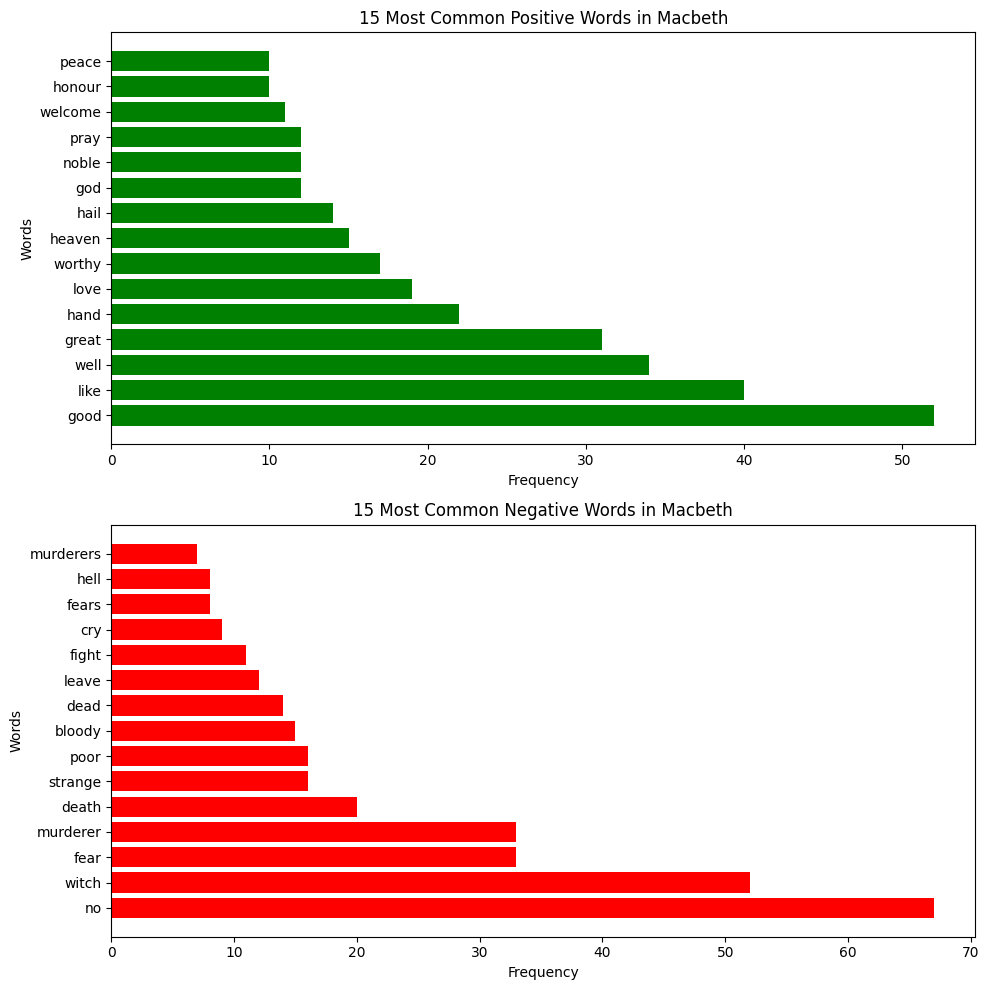

In [6]:
from nltk import FreqDist

positive_freq = FreqDist(positive_words)
negative_freq = FreqDist(negative_words)

most_common_positive = positive_freq.most_common(15)
most_common_negative = negative_freq.most_common(15)

positive_words, positive_counts = zip(*most_common_positive)
negative_words, negative_counts = zip(*most_common_negative)

fig, ax = plt.subplots(2, 1, figsize=(10, 10))

ax[0].barh(positive_words, positive_counts, color='green')
ax[0].set_xlabel('Frequency')
ax[0].set_ylabel('Words')
ax[0].set_title('15 Most Common Positive Words in Macbeth')

ax[1].barh(negative_words, negative_counts, color='red')
ax[1].set_xlabel('Frequency')
ax[1].set_ylabel('Words')
ax[1].set_title('15 Most Common Negative Words in Macbeth')

plt.tight_layout()
plt.show()

For positive words, 'good,' 'well', and 'like' appear in all of the plots, while a word like 'god' is not as common in any of the other plots.

For negative words, words related to 'death' and 'dead' are found in all plots, but the words 'no' and 'murderers' are not as common in any other plot except in Macbeth.

The word list we created from Macbeth did not have the stopwords removed.
* Repeat the above analysis, but do so for a list of Macbeth words in which the stopwords have been removed.
* What changes?

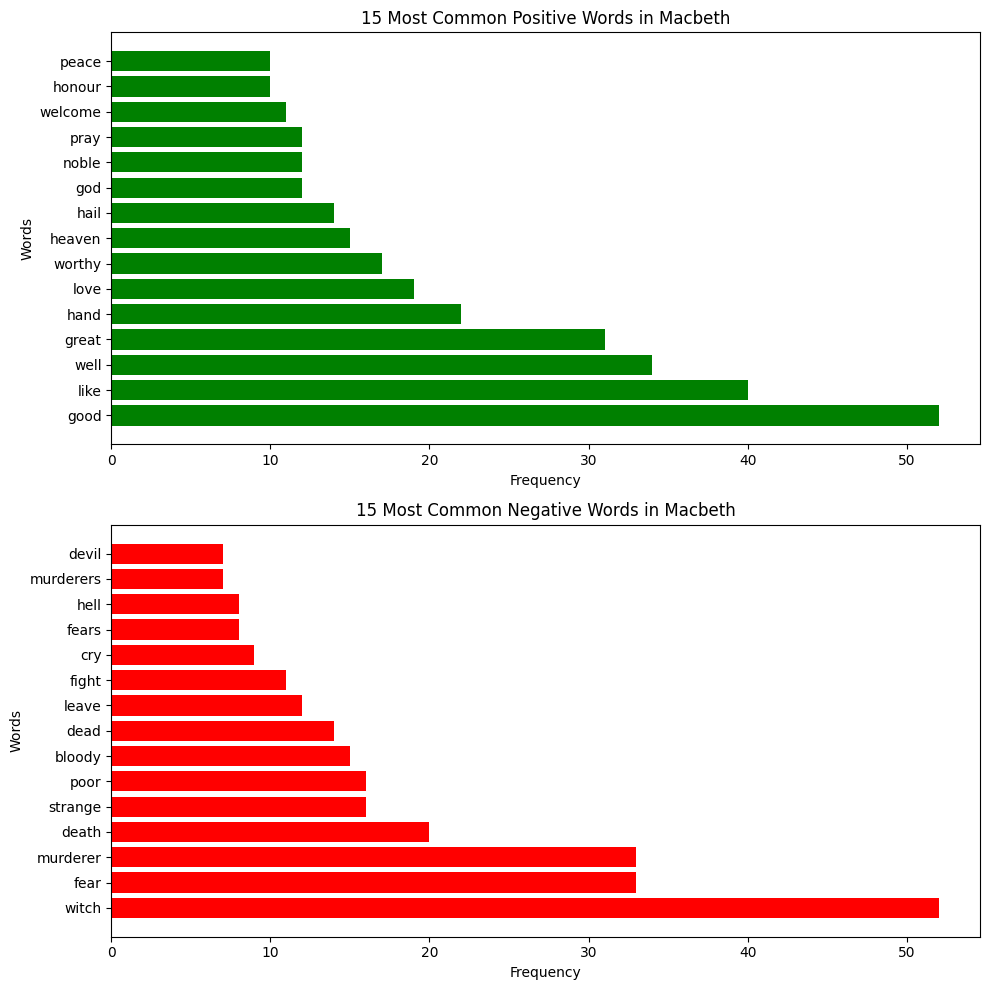

In [7]:
filtered_macbeth_words = [word for word in macbeth_words if word not in stop_words and word.isalpha()]

positive_words_filtered = []
negative_words_filtered = []

for word in filtered_macbeth_words:
    score = sia.polarity_scores(word)['compound']
    if score > 0:
        positive_words_filtered.append(word)
    elif score < 0:
        negative_words_filtered.append(word)

positive_freq_filtered = FreqDist(positive_words_filtered)
negative_freq_filtered = FreqDist(negative_words_filtered)

most_common_positive_filtered = positive_freq_filtered.most_common(15)
most_common_negative_filtered = negative_freq_filtered.most_common(15)

positive_words_filtered, positive_counts_filtered = zip(*most_common_positive_filtered)
negative_words_filtered, negative_counts_filtered = zip(*most_common_negative_filtered)

fig, ax = plt.subplots(2, 1, figsize=(10, 10))

ax[0].barh(positive_words_filtered, positive_counts_filtered, color='green')
ax[0].set_xlabel('Frequency')
ax[0].set_ylabel('Words')
ax[0].set_title('15 Most Common Positive Words in Macbeth (Filtered)')

ax[1].barh(negative_words_filtered, negative_counts_filtered, color='red')
ax[1].set_xlabel('Frequency')
ax[1].set_ylabel('Words')
ax[1].set_title('15 Most Common Negative Words in Macbeth (Filtered)')

plt.tight_layout()
plt.show()

The word 'no' was removed from the plot.

* Repeat the above analysis one more time -> in addition to removing the stopwords, use the Porter stemmer to get a list of stemmed words before you calculate the word frequencies.
* What words in your plot have now been counted together?

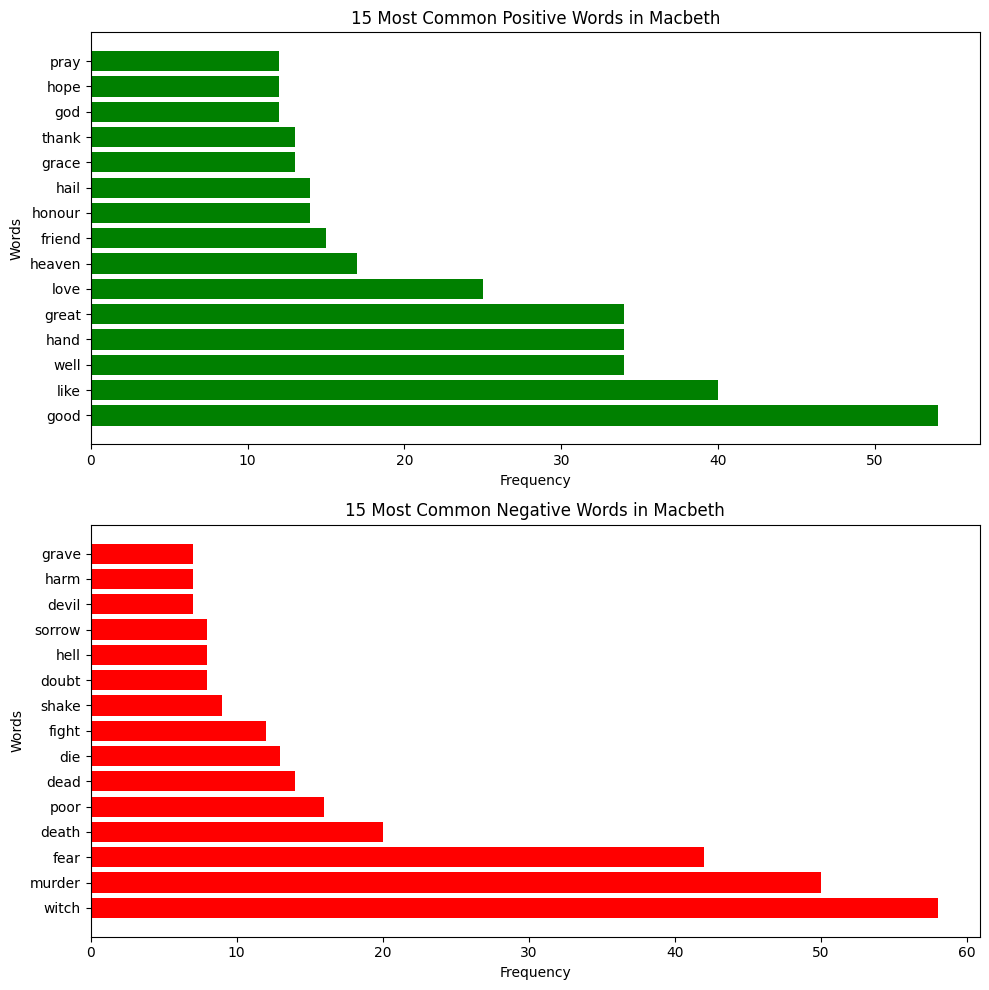

In [9]:
stemmer = PorterStemmer()

macbeth_words_filtered = [word for word in macbeth_words if word not in stop_words and word.isalpha()]
macbeth_words_stemmed = [stemmer.stem(word) for word in macbeth_words_filtered]

positive_words_stemmed = []
negative_words_stemmed = []

for word in macbeth_words_stemmed:
    score = sia.polarity_scores(word)['compound']

    if score > 0:
        positive_words_stemmed.append(word)
    elif score < 0:
        negative_words_stemmed.append(word)

positive_freq_filtered = FreqDist(positive_words_stemmed)
negative_freq_filtered = FreqDist(negative_words_stemmed)

most_common_positive_filtered = positive_freq_filtered.most_common(15)
most_common_negative_filtered = negative_freq_filtered.most_common(15)

positive_words_filtered, positive_counts_filtered = zip(*most_common_positive_filtered)
negative_words_filtered, negative_counts_filtered = zip(*most_common_negative_filtered)

fig, ax = plt.subplots(2, 1, figsize=(10, 10))

ax[0].barh(positive_words_filtered, positive_counts_filtered, color='green')
ax[0].set_xlabel('Frequency')
ax[0].set_ylabel('Words')
ax[0].set_title('15 Most Common Positive Words in Macbeth (Stemmed)')

ax[1].barh(negative_words_filtered, negative_counts_filtered, color='red')
ax[1].set_xlabel('Frequency')
ax[1].set_ylabel('Words')
ax[1].set_title('15 Most Common Negative Words in Macbeth (Stemmed)')

plt.tight_layout()
plt.show()

'murderers' has been combined with 'murderer' to make 'murder,' and 'fears' and 'fear' now make 'fear.'

## Romeo and Juliet

We are now going to plot the evolution of sentiment in Romeo and Juliet.

This is motivated by the following plot (also from the afore-mentioned link):

![image.png](attachment:image.png)

We are going to make a couple different plots.

First:
* Write a for loop that iterates over the scenes in Romeo and Juliet (`r_j_scenes`), and for each scene:
  * Make a list of the scene's words by tokenizing the string
  * Sum the compound sentiment scores of every word in the scene (using VADER's SentimentIntensityAnalyser's polarity_scores method to get the compound sentiment score for each word).
* Make a bar plot that has the scene number on the horizontal axis and the sentiment scores as the bar heights.
* Comment on its resemblance to the Romeo and Juliet plot above.

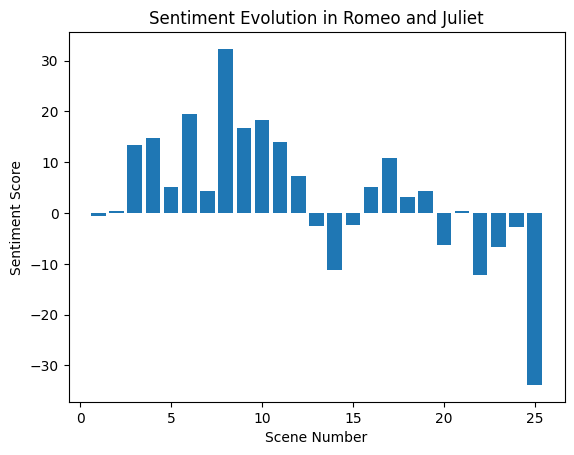

In [ ]:
scene_numbers = list(range(1, len(r_j_scenes) + 1))
scene_sentiments = []

for scene in r_j_scenes:
    scene_words = word_tokenize(scene)
    total_score = sum(sia.polarity_scores(word)['compound'] for word in scene_words)
    scene_sentiments.append(total_score)

plt.bar(scene_numbers, scene_sentiments)
plt.xlabel('Scene Number')
plt.ylabel('Sentiment Score')
plt.title('Sentiment Evolution in Romeo and Juliet')
plt.show()


Both plots have a similar overall sentiment score, with the beginning having more positive sentiment, and the ending having more negative sentiment.

Second:
* Write a for loop that iterates over the scenes in Romeo and Juliet (`r_j_scenes`), and for each scene:
  * Make a list of the scene's words by tokenizing the string
  * Calculate the total scene sentiment score by **adding 1 to the score for each positive word (compound_score > 0) and substracting 1 from the score for each negative word (compound_score < 0)**
    * This total is the difference between the positive and negative word counts
* Make a bar plot that has the scene number on the horizontal axis and the sentiment scores as the bar heights.
* Does this change the plot relative to the previous method of calculating the total scene sentiment score?

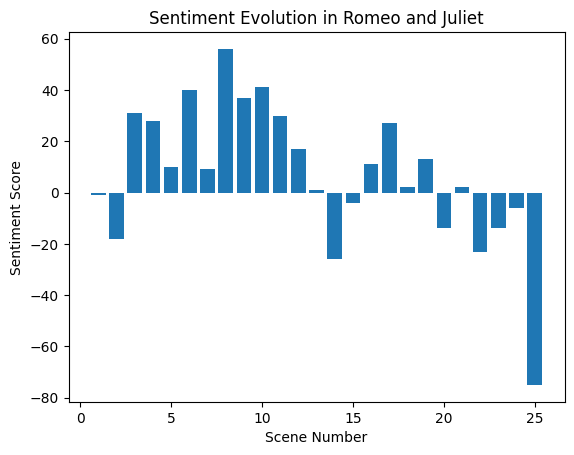

In [ ]:
scene_numbers = list(range(1, len(r_j_scenes) + 1))
scene_sentiments = []

for scene in r_j_scenes:
  scene_words = word_tokenize(scene)
  score = 0
  for word in scene_words:
    compound_score = sia.polarity_scores(word)['compound']
    if compound_score > 0:
      score += 1
    elif compound_score < 0:
      score -= 1
  scene_sentiments.append(score)

plt.bar(scene_numbers, scene_sentiments)
plt.xlabel('Scene Number')
plt.ylabel('Sentiment Score')
plt.title('Sentiment Evolution in Romeo and Juliet')
plt.show()


Yes, the plot has changed due to the way of calculation.

Next, we are going to use a new lexicon to assess positive and negative word sentiment, the opinion_lexicon (https://www.nltk.org/api/nltk.corpus.reader.opinion_lexicon.html)

Execute the following cell to make a set of positive words and a set of negative words.

In [ ]:
positive_words = set(opinion_lexicon.positive())
negative_words = set(opinion_lexicon.negative())

The following cell is an example of checking whether a word is positive or negative according to this opinion lexicon.  Try it out with a couple words.

In [ ]:
testword = 'murder'
if testword in positive_words:
    print(testword + ' is positive')
elif testword in negative_words:
    print(testword + ' is negative')
else:
    print(testword + ' is neither positive nor negative')

murder is negative


Third plot:

* Write a for loop that iterates over the scenes in Romeo and Juliet (`r_j_scenes`), and for each scene:
  * Make a list of the scene's words by tokenizing the string
  * Calculate the total scene sentiment score by **adding 1 for each positive word and substracting 1 for each negative word, where the positive/negative word is assessed by its presence in the `positive_words` and `negative_words` sets.**
    * This total is the difference between the positive and negative word counts
* Make a bar plot that has the scene number on the horizontal axis and the sentiment scores as the bar heights.
* Does this change the plot relative to the previous plots?

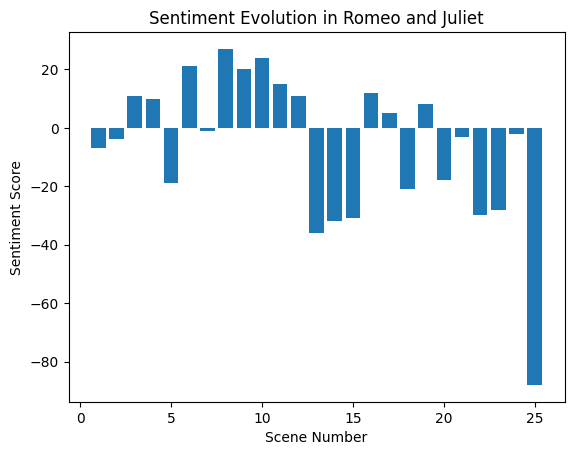

In [ ]:
scene_numbers = list(range(1, len(r_j_scenes) + 1))
scene_sentiments = []

for scene in r_j_scenes:
  scene_words = word_tokenize(scene)
  score = 0
  for word in scene_words:
    if word in positive_words:
      score += 1
    elif word in negative_words:
      score -= 1
  scene_sentiments.append(score)

plt.bar(scene_numbers, scene_sentiments)
plt.xlabel('Scene Number')
plt.ylabel('Sentiment Score')
plt.title('Sentiment Evolution in Romeo and Juliet')
plt.show()

Yes, the plot has changed compared to the others. It is showing much more negative sentiment.

Fourth plot:

* Take the entire string of Romeo and Juliet (`r_j_string`) and tokenize it into words.
* Calculate a total sentiment score for each consecutive group of 500 words.
  * Do this as immediately above by adding 1 for each positive word and substracting 1 for each negative word, where the positive/negative word is assessed by its presence in the `positive_words` and `negative_words` sets.
* Make a bar plot that has the group number (0,1,2,3,...) on the horizontal axis and the sentiment scores as the bar heights.
* Does this change the plot relative to the previous plots?

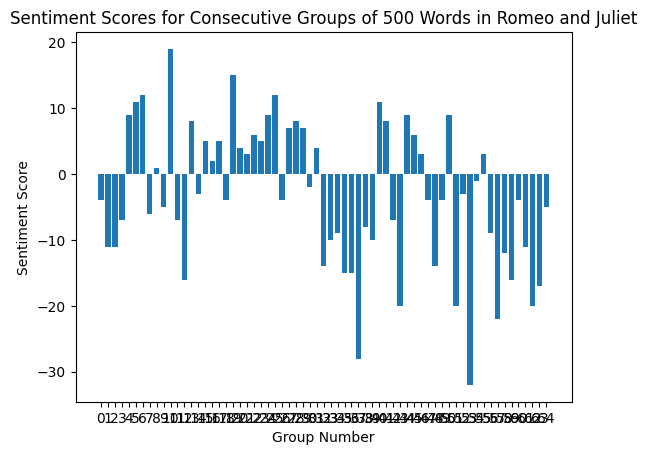

In [ ]:
r_j_words = word_tokenize(r_j_string)

group_sentiments = []
group_number = 0
score = 0

for i, word in enumerate(r_j_words):
    if word in positive_words:
        score += 1
    elif word in negative_words:
        score -= 1

    if (i + 1) % 500 == 0:
        group_sentiments.append(score)
        group_number += 1
        score = 0

if len(r_j_words) % 500 != 0:
    group_sentiments.append(score)
    group_number += 1

group_numbers = list(range(group_number))

plt.bar(group_numbers, group_sentiments)
plt.xlabel('Group Number')
plt.ylabel('Sentiment Score')
plt.title('Sentiment Scores for Consecutive Groups of 500 Words in Romeo and Juliet')
plt.xticks(group_numbers)
plt.show()


This has largely changed the plot. It has resulted in a plot a lot similar to the one found in the link above.

What method would you use if you had to report on the evolution of sentiment in Romeo and Juliet to an audience of Shakespearian academics?

I would use the method for the fourth plot, because it has more detail and looks more like the one in the plot in the link attached.